# Causal Analysis of Synthetic Dataset

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import dowhy
from dowhy.do_why import CausalModel

In [52]:
TREATMENT = 'ContinentOfBirth'
#TREATMENT = 'CitizenshipContinent'

In [53]:
dataset = pd.read_csv('data/synthetic-dataset-scenario-B.csv')

,Source,Last Name,CountryOfBirth,ContinentOfBirth,CitizenshipCountry,CitizenshipContinent,NumChildren,MaritalStatus,Last Name Correct
0,B,ztyji,China,Asia,China,Asia,2,Married,False
1,B,eqjin,Canada,North America,Canada,North America,2,Single,True
2,D,npqyp,China,Asia,China,Asia,4,Widowed,False
3,A,vwsqy,France,Europe,Canada,North America,4,Widowed,True
4,A,jsnjz,Japan,Asia,Japan,Asia,2,Single,True


In [55]:
# Introduce binary treatment column as proposed by Data X-Ray
dataset['Treatment'] = dataset[TREATMENT] == 'Asia'
dataset.head()

,Source,Last Name,CountryOfBirth,ContinentOfBirth,CitizenshipCountry,CitizenshipContinent,NumChildren,MaritalStatus,Last Name Correct,Treatment
0,B,ztyji,China,Asia,China,Asia,2,Married,False,True
1,B,eqjin,Canada,North America,Canada,North America,2,Single,True,False
2,D,npqyp,China,Asia,China,Asia,4,Widowed,False,True
3,A,vwsqy,France,Europe,Canada,North America,4,Widowed,True,False
4,A,jsnjz,Japan,Asia,Japan,Asia,2,Single,True,True


In [56]:
graph = nx.DiGraph()

# potential confounders
for col in dataset.drop(['Last Name', 'Last Name Correct', 'Treatment', TREATMENT, 'CountryOfBirth'], axis=1).columns:
    graph.add_edge(col, 'Treatment')
    graph.add_edge(col, 'Last Name Correct')
    
#graph.add_edge('Unobserved Confounders', 'Treatment')
#graph.add_edge('Unobserved Confounders', 'Last Name Correct')

# Assumed causal relation
graph.add_edge('Treatment', 'Last Name Correct')

['MaritalStatus', 'NumChildren', 'CitizenshipCountry', 'CitizenshipContinent', 'Source']
yes
{'observed': 'yes'}
yes
{'observed': 'yes'}
yes
{'observed': 'yes'}
yes
{'observed': 'yes'}
yes
{'observed': 'yes'}
Model to find the causal effect of treatment Treatment on outcome Last Name Correct
Using Matplotlib for plotting


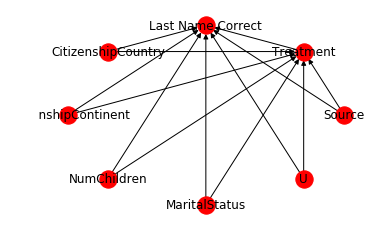

In [57]:
model = CausalModel(data = dataset, treatment='Treatment', outcome='Last Name Correct', graph=''.join(nx.generate_gml(graph)))
model.view_model()

In [58]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'MaritalStatus', 'U', 'NumChildren', 'CitizenshipCountry', 'CitizenshipContinent', 'Source'}


{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
There are unobserved common causes. Causal effect cannot be identified.


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n]  y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(Last Name Correct|MaritalStatus,NumChildren,Citizenship
dTreatment                                                                    

                                     
Country,CitizenshipContinent,Source))
                                     
Estimand assumption 1, Unconfoundedness: If U→Treatment and U→Last Name Correct then P(Last Name Correct|Treatment,MaritalStatus,NumChildren,CitizenshipCountry,CitizenshipContinent,Source,U) = P(Last Name Correct|Treatment,MaritalStatus,NumChildren,CitizenshipCountry,CitizenshipContinent,Source)
### Estimand : 2
Estimand name: iv
No such variable found!



In [59]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name='backdoor.linear_regression')
print(causal_estimate)
print('Causal Estimate is ' + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Last Name Correct~Treatment+MaritalStatus+NumChildren+CitizenshipCountry+CitizenshipContinent+Source


LinearRegressionEstimator
*** Causal Estimate ***

## Target estimand
Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                         
──────────(Expectation(Last Name Correct|MaritalStatus,NumChildren,Citizenship
dTreatment                                                                    

                                     
Country,CitizenshipContinent,Source))
                                     
Estimand assumption 1, Unconfoundedness: If U→Treatment and U→Last Name Correct then P(Last Name Correct|Treatment,MaritalStatus,NumChildren,CitizenshipCountry,CitizenshipContinent,Source,U) = P(Last Name Correct|Treatment,MaritalStatus,NumChildren,CitizenshipCountry,CitizenshipContinent,Source)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Last Name Correct~Treatment+MaritalStatus+NumChildren+CitizenshipCountry+CitizenshipContinent+Source
## Estimate
Val